In [47]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

In [48]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [49]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [50]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


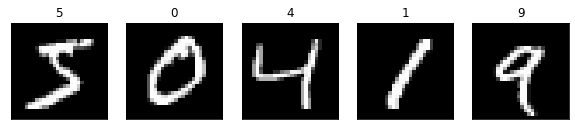

In [51]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [52]:
to_categorical(3, num_classes=10)


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [53]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [54]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [62]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
#model.add(Dense(15, activation='sigmoid'))
#model.add(Dense(25, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [63]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [65]:
model.fit(X_train, y_train, epochs=5, 
          validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 24us/step - loss: 1.6038 - acc: 0.4924 - val_loss: 1.2065 - val_acc: 0.6003
Epoch 2/5
60000/60000 [==============================] - 1s 22us/step - loss: 1.1230 - acc: 0.6198 - val_loss: 1.0373 - val_acc: 0.6604
Epoch 3/5
60000/60000 [==============================] - 1s 22us/step - loss: 1.0092 - acc: 0.6549 - val_loss: 0.9507 - val_acc: 0.6821
Epoch 4/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.9425 - acc: 0.6790 - val_loss: 0.8718 - val_acc: 0.7096
Epoch 5/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.9012 - acc: 0.6928 - val_loss: 0.8559 - val_acc: 0.7027


In [66]:
predictions = model.predict(X_test)
print(predictions)

[[5.0189365e-03 2.9936686e-04 1.8792147e-02 ... 8.8642615e-01
  6.4058293e-04 4.9795430e-02]
 [1.8870552e-03 1.0679315e-02 4.5061463e-01 ... 4.9187616e-03
  2.5046300e-02 1.3271812e-03]
 [3.5270437e-04 9.2928118e-01 2.2847340e-02 ... 6.0055911e-05
  2.8749343e-02 1.3940706e-03]
 ...
 [7.4970711e-05 1.5950971e-03 1.7080497e-03 ... 2.2171639e-02
  8.7753043e-02 3.8979891e-01]
 [5.3210601e-02 2.2591918e-03 2.8324647e-02 ... 1.0937186e-03
  6.5491572e-02 1.5549790e-03]
 [5.3210601e-02 2.2591918e-03 2.8324647e-02 ... 1.0937186e-03
  6.5491572e-02 1.5549790e-03]]


In [67]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 3 1 ... 4 6 6]


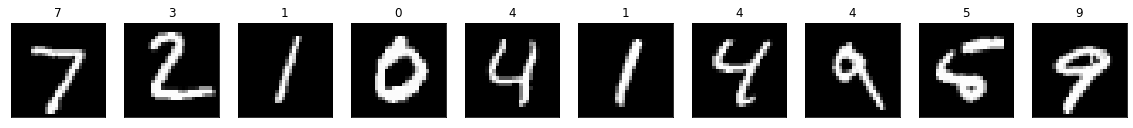

In [68]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()